In [3]:
#Tools :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Models  : 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluators
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import plot_roc_curve,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

In [4]:
#reading the data
df = pd.read_csv("heart-disease.csv")

<AxesSubplot:>

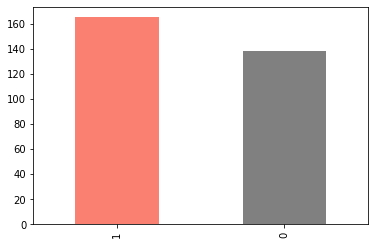

In [74]:
#1 denotes heart-disease and 0 denotes not heart-disease
df["target"].value_counts()
df["target"].value_counts().plot(kind = "bar" , color = ["salmon","grey"])

In [6]:
#for sex 1= male and 0 = female
df["sex"].value_counts()


1    207
0     96
Name: sex, dtype: int64

<AxesSubplot:>

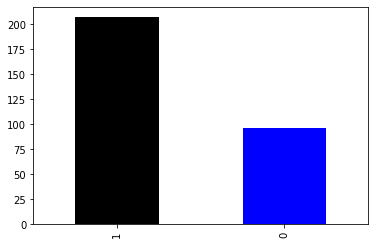

In [7]:
df["sex"].value_counts().plot(kind = "bar",color = ["black","blue"])

In [8]:
#comparing the target columns with sex columns:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


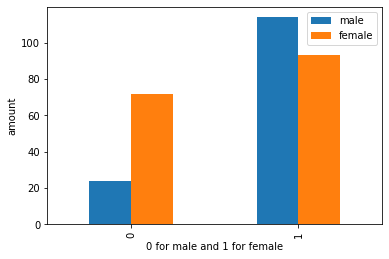

In [9]:
#pd.crosstab(df["sex"],df["target"]).plot(kind= "bar")
pd.crosstab(df["sex"],df["target"]).plot(kind= "bar")
plt.xlabel("0 for male and 1 for female")
plt.ylabel("amount")
plt.legend(["male",'female'])



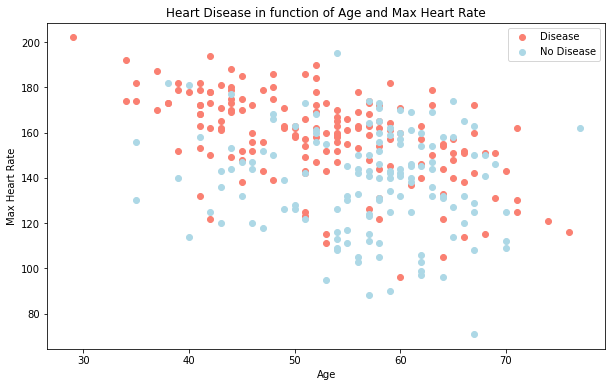

In [10]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

<AxesSubplot:ylabel='Frequency'>

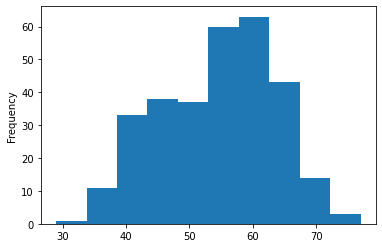

In [11]:
#age distirbution
df["age"].plot(kind = 'hist')

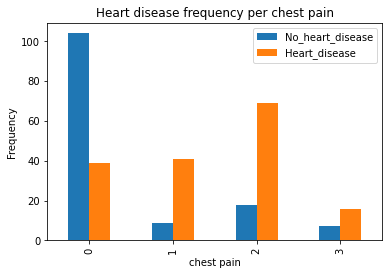

In [12]:
pd.crosstab(df["cp"],df["target"]).plot(kind = 'bar')
plt.xlabel("chest pain")
plt.ylabel("Frequency")
plt.title("Heart disease frequency per chest pain")
plt.legend(["No_heart_disease","Heart_disease"])

In [13]:
#Model drives EDA
#Getting the dataset ready
x = df.drop("target",axis =1)#feature variables
y = df["target"] #target variables
np.array(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
#splitting out data into test and train 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [15]:
x_train.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3


In [16]:
len(y_test)

61

In [82]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [86]:
 fit_and_score(models, x_train, x_test, y_train, y_test)

C:\Users\Srivathsan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.639344262295082,
 'Logistic Regression': 0.8032786885245902,
 'Random Forest': 0.7868852459016393}

In [87]:
#Model Comparrison
model_compare = pd.DataFrame(model_scores,index = ["acc"]).T.plot.bar()

NameError: name 'model_scores' is not defined

In [88]:
##Hyper parameter tuning by hand
train_score = []
test_score = []
knn = KNeighborsClassifier()
neighbors = range(1,21)
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train,y_train)
    a=knn.score(x_train,y_train)
    train_score.append(a)
    b=knn.score(x_test,y_test)
    test_score.append(b)
    
test_score
    

[0.5245901639344263,
 0.5409836065573771,
 0.639344262295082,
 0.5737704918032787,
 0.639344262295082,
 0.5901639344262295,
 0.6557377049180327,
 0.5901639344262295,
 0.6065573770491803,
 0.5737704918032787,
 0.6229508196721312,
 0.5901639344262295,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.5901639344262295,
 0.6229508196721312,
 0.5901639344262295,
 0.6065573770491803,
 0.6065573770491803]

Maximum KNN score on the test data: 65.57%


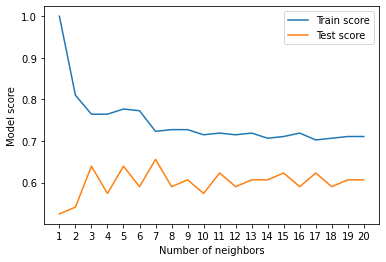

In [79]:
plt.plot(neighbors,train_score, label="Train score")
plt.plot(neighbors,test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [80]:
#tuning the model with randomizedsearchCV
model = LogisticRegression()
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [63]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [89]:
#passing randomizedsearchcv with logisticRegression
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [66]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.08858667904100823}

In [67]:
rs_log_reg.score(x_test, y_test)


0.8360655737704918

In [103]:
#Tuning with GridSearchCV
grid_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
gs = GridSearchCV(LogisticRegression(),cv = 5 , param_grid = grid_grid,verbose = True)
gs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [99]:
gs.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [100]:
gs.score(x_test,y_test)

0.8360655737704918

In [93]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [105]:
y_preds = gs.predict(x_test)
y_preds

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [107]:
np.array(y_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

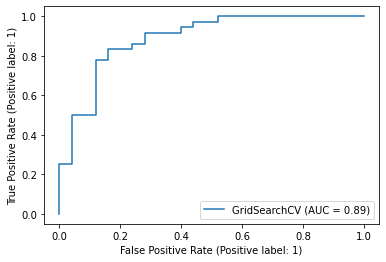

In [112]:
# ROC and AUC curve:
plot_roc_curve(gs,x_test,y_test)

In [115]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds));
a = confusion_matrix(y_test,y_preds)

[[18  7]
 [ 3 33]]


Text(24.0, 0.5, 'predicted label')

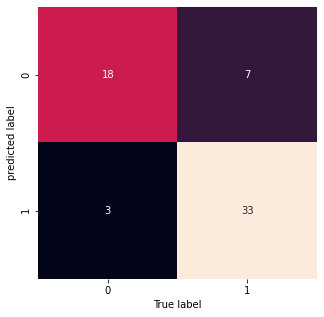

In [127]:
#using seaborn's heatmap
fig,ax = plt.subplots(figsize = (5,5))
sns.heatmap(a,annot = True,cbar = False)
plt.xlabel("True label")
plt.ylabel("predicted label")

In [129]:
#Classification report:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.82      0.92      0.87        36

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



In [131]:
gs.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [136]:
#using cross validation
clf = LogisticRegression(C= 0.08858667904100823,solver= 'liblinear')

In [138]:
cross_val = cross_val_score(clf,x,y,cv=5)

In [139]:
np.mean(cross_val)

0.834808743169399

In [141]:
#precision score:
cross_val_p = cross_val_score(clf,x,y,cv=5,scoring = "precision")
np.mean(cross_val_p)

0.8182683982683983

In [143]:
#recall score:
cross_val_r = cross_val_score(clf,x,y,cv=5,scoring = 'recall')
np.mean(cross_val_r)

0.9030303030303031

In [145]:
# f1 score
cross_val_f1 = cross_val_score(clf,x,y,cv=5,scoring = 'f1')
np.mean(cross_val_f1)

0.8572876223964057

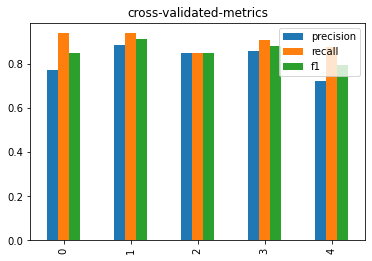

In [152]:
df = pd.DataFrame({'precision' : cross_val_p , 'recall' : cross_val_r, 'f1' : cross_val_f1}).plot(kind = 'bar',title = 'cross-validated-metrics'
                                                                                                 )
